In [2]:
import sklearn
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
data = pd.read_csv('carbig.csv')
data.head()

,Acceleration,Cylinders,Displacement,Horsepower,Model_Year,Weight,Origin,MPG
0,12.0,8,307.0,130.0,70,3504,USA,18.0
1,11.5,8,350.0,165.0,70,3693,USA,15.0
2,11.0,8,318.0,150.0,70,3436,USA,18.0
3,12.0,8,304.0,150.0,70,3433,USA,16.0
4,10.5,8,302.0,140.0,70,3449,USA,17.0


In [4]:
#converting str var to numerical class to be able to consider origin
origin =[ ]
for i in np.arange(0,len(data)):
    for p in np.arange(0, len(data['Origin'].unique())):
        if pd.get_dummies(data['Origin']).iloc[i,p] > 0:
            origin.append(p)
            
data['Origin_Num'] = origin

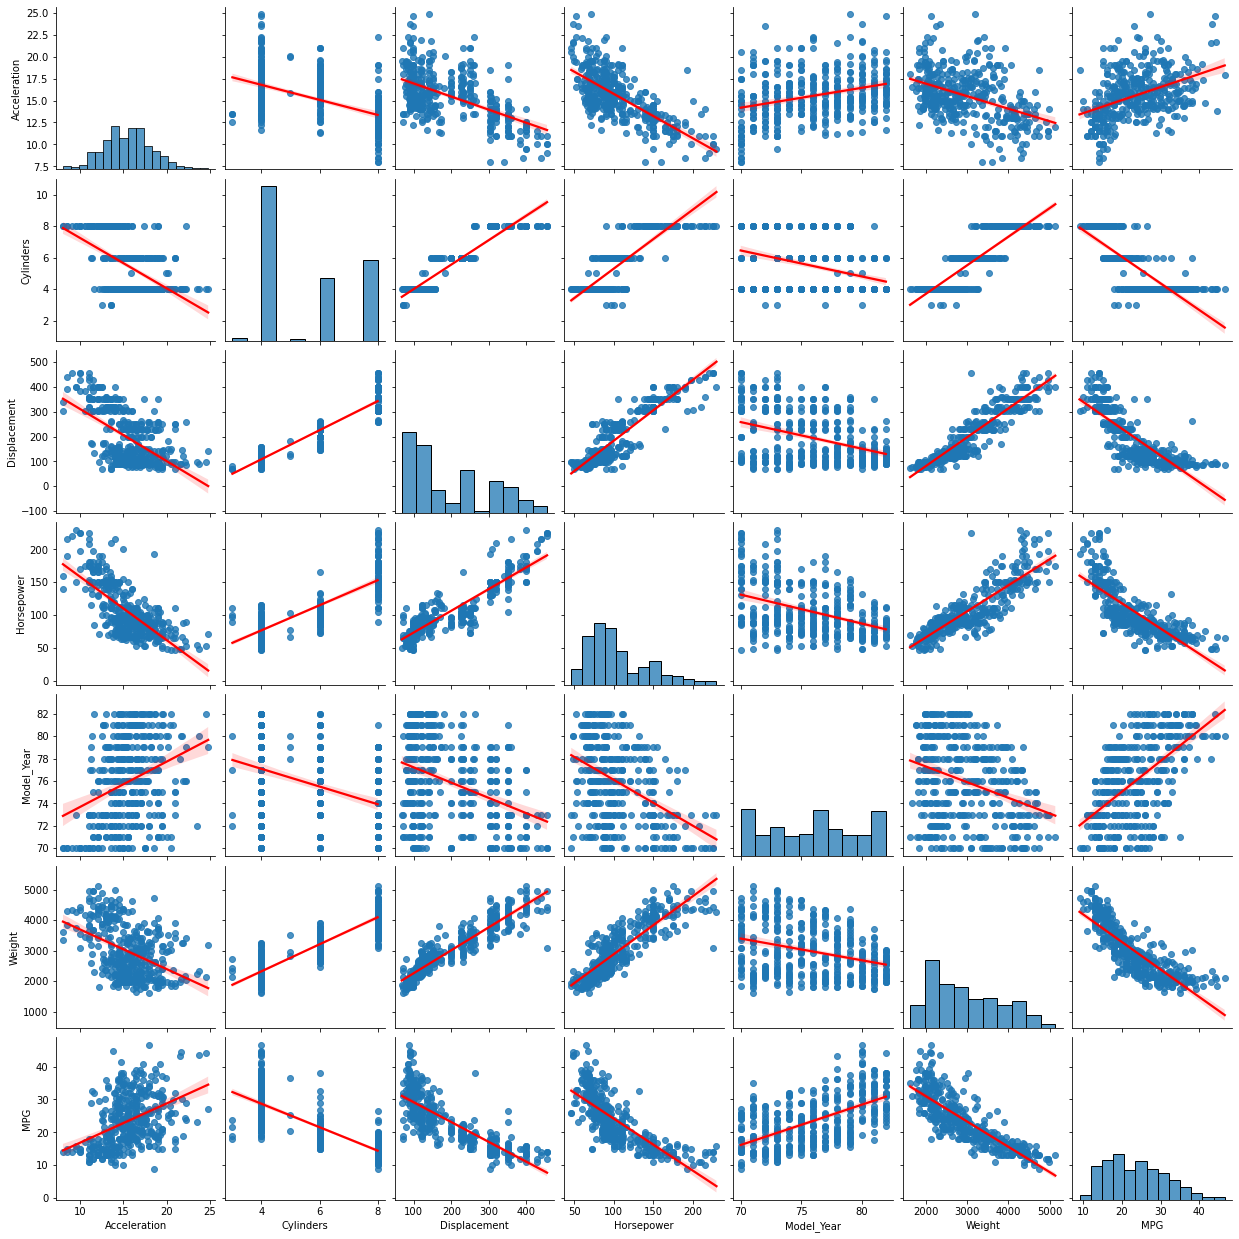

In [39]:
# g = sns.PairGrid(data)
# g.map(sns.scatterplot)

g = sns.pairplot(data.iloc[:,0:8], kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.savefig('corr_mat.png',bbox_inches='tight')
plt.show()


In [40]:
feat_table_mpg = data[['Cylinders','Displacement','Horsepower','Model_Year','Weight','Origin_Num','MPG']].dropna()
X_train, X_test, y_train, y_test = train_test_split(feat_table_mpg.iloc[:,0:6],feat_table_mpg.iloc[:,-1],test_size=0.2,shuffle=True)
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2 = reg.score(X_test, y_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print('The RMSE of the MPG model is: ',rms)
print('The R2 score of the MPG model is: ',r2)

The RMSE of the MPG model is:  2.924276104645328
The R2 score of the MPG model is:  0.8548852955036415


In [41]:
feat_table_acc = data[['Cylinders','Displacement','Horsepower','Model_Year','Weight','Origin_Num','Acceleration']].dropna()
X_train, X_test, y_train, y_test = train_test_split(feat_table_acc.iloc[:,0:6],feat_table_acc.iloc[:,-1],test_size=0.2,shuffle=True)
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2 = reg.score(X_test, y_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print('The RMSE of the Acceleration model is: ',rms)
print('The R2 score of the Acceleration model is: ',r2)

The RMSE of the Acceleration model is:  1.5786916552483075
The R2 score of the Acceleration model is:  0.7391128749470826
